In [21]:
import pandas as pd

dataset_path = 'data/output.xlsx'
dataset = pd.read_excel(dataset_path)
dataset_copy = dataset.copy()
display(dataset_copy)

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7777,14918,2825,2009,1841,сenter
1,Брянская область,4560,10211,1538,1418,837,сenter
2,Владимирская область,5802,8902,1703,1468,320,сenter
3,Воронежская область,9292,17186,3362,2458,4347,сenter
4,Ивановская область,4495,5649,1338,977,1288,сenter
...,...,...,...,...,...,...,...
68,Хабаровский край,5689,10688,1877,1648,1800,dv
69,Амурская область,2954,7211,929,977,829,dv
70,Магаданская область,787,1215,331,202,97,dv
71,Сахалинская область,3332,4511,792,507,131,dv


In [22]:
dataset_copy = dataset_copy.replace(
    ['сenter', 'nw', 'south', 'caucasus', 'volga', 'ural', 'siberia', 'dv'],
    [1, 2, 3, 4, 5, 6, 7, 8])

dataset_copy.head(100)

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7777,14918,2825,2009,1841,1
1,Брянская область,4560,10211,1538,1418,837,1
2,Владимирская область,5802,8902,1703,1468,320,1
3,Воронежская область,9292,17186,3362,2458,4347,1
4,Ивановская область,4495,5649,1338,977,1288,1
...,...,...,...,...,...,...,...
68,Хабаровский край,5689,10688,1877,1648,1800,8
69,Амурская область,2954,7211,929,977,829,8
70,Магаданская область,787,1215,331,202,97,8
71,Сахалинская область,3332,4511,792,507,131,8


<Axes: xlabel='x1', ylabel='x2'>

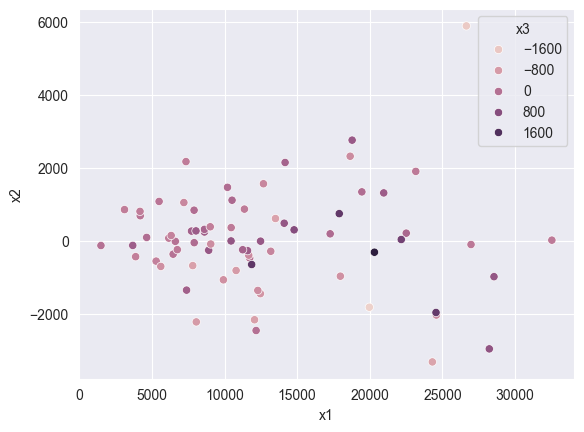

In [23]:
from sklearn.decomposition import TruncatedSVD
import seaborn as sns

svd = TruncatedSVD(3)
dataset_svd = svd.fit_transform(dataset_copy.loc[:, 'x1':'x5'])
dataset_svd = pd.DataFrame(dataset_svd, columns=['x1', 'x2', 'x3'])

sns.scatterplot(data=dataset_svd, x='x1', y='x2', hue='x3')

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=7)
kmeans.fit(dataset_svd)
y_kmeans = kmeans.predict(dataset_svd)

plt.scatter(dataset_svd.loc[:, 0], dataset_svd.loc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='white', s=200, alpha=0.5)

C:\Users\KirillPogranichny\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyError: 0